# Setup

In [18]:
# Get CIFAR-10 dataset in .png format
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

# Clone ESRGAN repo here
!git clone https://github.com/xinntao/ESRGAN.git
  
# Folders required for loading and storing images 
!mkdir LR 
!mkdir results

# Install Opencv
!pip install opencv-python

# Clone Repo
!pip install --user keras-importance-sampling
!git clone https://github.com/idiap/importance-sampling.git
  
# Convert the repo into a module for usage in the notebook
!touch importance-sampling/__init__.py
!touch importance-sampling/importance_sampling/__init__.py
!touch importance-sampling/examples/__init__.py
!cp -r importance-sampling/* .

# Copy contents of repo for easy usage 
!cp -r importance-sampling/* .

URL transformed to HTTPS due to an HSTS policy
--2019-04-26 23:07:10--  https://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz.2’

cifar.tgz.2         100%[===================>] 160.77M  75.4MB/s    in 2.1s    

2019-04-26 23:07:12 (75.4 MB/s) - ‘cifar.tgz.2’ saved [168584360/168584360]

fatal: destination path 'ESRGAN' already exists and is not an empty directory.
mkdir: cannot create directory ‘LR’: File exists
mkdir: cannot create directory ‘results’: File exists
fatal: destination path 'importance-sampling' already exists and is not an empty directory.


# Download Pretrained Models from Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1mSJ6Z40weL-dnPvi390xDd3uZBCFMeqr'
X = drive.CreateFile({'id': file_id})
X = X.GetContentFile('ESRGAN/models/RRDB_PSNR.pth')

file_id = '1MJFgqXJrMkPdKtiuy7C6xfsU1QIbXEb-'
Y = drive.CreateFile({'id': file_id})
Y = Y.GetContentFile('ESRGAN/models/RRDB_ESRGAN.pth')

# Imports


In [0]:
import cv2 as cv
import imageio
from PIL import Image
import os
import glob
import numpy as np
from keras.models import load_model
from importance_sampling.layers.normalization import LayerNormalization

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
!ls gdrive/My\ Drive

'Appel A.W. - Modern compiler implementation in ML-CUP (1999).pdf'
'(Cambridge Series in Statistical and Probabilistic Mathematics) David Pollard - A User’s Guide to Measure Theoretic Probability-Cambridge University Press (2001).pdf'
'Personal-Data Information Worksheet.gsheet'
 res-net-28-2-1hr-dropout-IS-acc.png
 res-net-28-2-1hr-dropout-IS.h5
 res-net-28-2-1hr-dropout-IS-history.npy
 res-net-28-2-1hr-dropout-IS-loss.png
 res-net-28-2-1hr-dropout-noIS-acc.png
 res-net-28-2-1hr-dropout-noIS.h5
 res-net-28-2-1hr-dropout-noIS-history.npy
 res-net-28-2-1hr-dropout-noIS-loss.png
 res-net-28-2-1hr-nodropout-IS-acc.png
 res-net-28-2-1hr-nodropout-IS.h5
 res-net-28-2-1hr-nodropout-IS-history.npy
 res-net-28-2-1hr-nodropout-IS-loss.png
 res-net-28-2-1hr-nodropout-noIS-acc.png
 res-net-28-2-1hr-nodropout-noIS.h5
 res-net-28-2-1hr-nodropout-noIS-history.npy
 res-net-28-2-1hr-nodropout-noIS-loss.png
 resume-2.pdf
 resume.pdf
'S. Boyd, L. Vandenberghe - Convex Optimization-Cambridge  (2009).pdf'

In [21]:
model = load_model('gdrive/My Drive/res-net-28-2-1hr-dropout-IS.h5', custom_objects = {'LayerNormalization' : LayerNormalization})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [113]:
#im = cv.imread('cifar/test/0_cat.png')
#cv2.imwrite('new.jpg', im)

!cp cifar/test/0_cat.png small_cat.png
!ls -l small_cat.png
im = Image.open('small_cat.png')
#im.save('new.jpg')
#!ls -l new.jpg
im.thumbnail((8,8), Image.BICUBIC)
im.save('small_cat.png')
!ls -l small_cat.png
im = cv.imread('small_cat.png')
print(im.shape)
#cv.imwrite("compressed.png", im, [int(cv.IMWRITE_PNG_COMPRESSION), 9])
'''
encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), 5]
result, encimg = cv2.imencode('.jpg', im, encode_param)
print(encimg.shape)
cv2.imwrite('new.jpg', encimg)

im1 = Image.open('new.jpg')
IMAGE_10 = os.path.join('new.jpg')
im1.save(IMAGE_10,"JPEG", quality=50)
#im10 = Image.open(IMAGE_10)

!ls -l new.jpg

im = Image.open('new.jpg')
im.save('new.png')
!ls -l new.png

import matplotlib.image as img
image = img.imread('new.png')
image.shape
'''
!rm LR/*
!cp small_cat.png LR/
!cp  cifar/test/0_cat.png LR/

-rw-r--r-- 1 root root 3187 Apr 26 22:30 small_cat.png
-rw-r--r-- 1 root root 268 Apr 26 22:30 small_cat.png
(8, 8, 3)


In [30]:
labels = []
acc = 0
label_mapping = {'airplane':0, 'automobile':1, 'bird': 2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
for im_path in glob.glob("cifar/test/*.png"):
  split = im_path.split('/')
  split = split[-1].split('_')
  label = split[-1].split('.')[0]
  
  # Convert label to integer
  labels.append(label_mapping[label])
  
  im = cv.imread(im_path)
  pred = model.predict(np.array([im]))
  if np.argmax(pred) == label_mapping[label]:
    acc += 1
print(acc/10000)
labels = np.array(labels)

0.113


In [114]:
from IPython.display import Image as I
I(filename='LR/small_cat.png') 

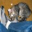

In [115]:
I(filename='LR/0_cat.png')

In [1]:
from keras.datasets import cifar10
x,y = cifar10.load_data()
print(y[0][0].shape)

Using TensorFlow backend.


(32, 32, 3)


In [0]:
for im_path in glob.glob("path/to/folder/*.png"):
     im = imageio.imread(im_path)
     print(im.shape)
      
pngs = glob('./*.png')

for j in pngs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)

In [116]:
!python ESRGAN/test.py ESRGAN/models/RRDB_ESRGAN.pth

Model path ESRGAN/models/RRDB_ESRGAN.pth. 
Testing...
1 small_cat
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
2 0_cat


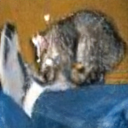

In [117]:
I(filename='results/0_cat_rlt.png')

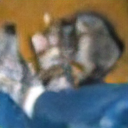

In [112]:
I(filename='results/small_cat_rlt_rlt.png')

(32, 32, 3)


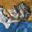

In [118]:

im1 = cv.imread('results/small_cat_rlt.png')
print(im1.shape)
I(filename='results/small_cat_rlt.png')


In [0]:
!rm results/*

In [0]:
!cp results/small_cat_rlt.png LR/

In [119]:
!ls cifar/test

0_cat.png	     4000_ship.png	  7001_automobile.png
1000_dog.png	     4001_bird.png	  7002_cat.png
1001_airplane.png    4002_deer.png	  7003_horse.png
1002_ship.png	     4003_bird.png	  7004_cat.png
1003_deer.png	     4004_airplane.png	  7005_automobile.png
1004_ship.png	     4005_dog.png	  7006_frog.png
1005_automobile.png  4006_ship.png	  7007_truck.png
1006_automobile.png  4007_frog.png	  7008_automobile.png
1007_ship.png	     4008_ship.png	  7009_frog.png
1008_truck.png	     4009_bird.png	  700_horse.png
1009_frog.png	     400_truck.png	  7010_airplane.png
100_deer.png	     4010_horse.png	  7011_horse.png
1010_airplane.png    4011_horse.png	  7012_horse.png
1011_ship.png	     4012_cat.png	  7013_automobile.png
1012_frog.png	     4013_automobile.png  7014_cat.png
1013_automobile.png  4014_ship.png	  7015_cat.png
1014_cat.png	     4015_automobile.png  7016_cat.png
1015_deer.png	     4016_frog.png	  7017_automobile.png
1016_automobile.png  4017_dog.png	  7018_airplane.png
1017_frog.png